### Questions 7 Logistic Regression Implementation:       

a) Write down a code in Python whose input is a training dataset{(x1,y1),...,(xN,yN)}and its output is the weight vector w and bias b in the logistic regression model y=σ(w>x+b).  The method must use the gradient descent approach, presented in the class.     

b) Download the dataset of the HW02 on the piazza page. The dataset is in Matlab format (.mat);you can use scipy.io.savemat to convert it to python format (.npy).  Run the code on the training dataset to compute w, b and evaluate on the test dataset.   Report the classification error on the training set and classification error on the test set.  Plot the data (use different colors for data indifferent classes) and plot the decision boundary found by the logistic regressions.

In [29]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Convert the dataset from mat to .npy format

data = sio.loadmat("hw02_dataset.mat")
X_train = data['X_trn']
X_test = data['X_tst']
Y_train = data['Y_trn']
Y_test = data['Y_tst']

In [31]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(126, 2)
(126, 1)
(14, 2)
(14, 1)


In [32]:
class Logistic_Regression:
    
    def __init__(self, lr=0.01, iters=100):
        self.lr = lr
        self.iters = iters
        self.weights = None
        self.bias = None
        
        
    def sigmoid(self, x):
        sigmoid = 1/(1 + np.exp(-x))
        return sigmoid
    
    
    def predict(self, X):
        hypothesis_x = np.dot(X, self.weights) + self.bias
        pred_y = self.sigmoid(hypothesis_x)
        pred_y_class = [1 if i > 0.5 else 0 for i in pred_y]
        return np.array(pred_y_class)
    
    
    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    
    def classification_error(self, y_true, y_pred):
        error = np.sum(y_true != y_pred) / len(y_true)
        return error

    
    def gradient_descent(self, X, y):
        
        m, n = X.shape   # m:no. of samples, n: no. of features
        
        # Initialize weights and bias
        self.weights = np.zeros(n)  # shape:(2,)
        self.weights = self.weights.reshape(n, 1)
        self.bias = 0
        for i in range(self.iters):

            # Get the linear combination of weights, features and bias
            hypothesis_x = np.dot(X, self.weights) + self.bias   # h(x) = wx + b
            hypothesis_x = hypothesis_x.reshape(m, 1)
            
            # Apply sigmoid to get the probability
            pred_y = self.sigmoid(hypothesis_x)  
            pred_y = pred_y.reshape(m, 1)

            # Compute gradients of weights and bias 
            dw = (1/m) * np.dot(X.T, (pred_y - y))
            db = (1/m) * np.sum(pred_y - y)
            
            # Update the parameters
            self.weights -=  self.lr * dw
            self.bias -= self.lr * db
            
        return self.weights, self.bias
            



In [33]:
# Running for training data

logit_obj = Logistic_Regression(lr=0.01, iters=1000)
weights, bias = logit_obj.gradient_descent(X_train, Y_train)
print("Training Weights are : ", weights)
print("Training Bias is: ", bias)


Training Weights are :  [[ 1.87118392]
 [-0.40405102]]
Training Bias is:  0.42432599069546795


In [34]:
# Finding accuracy and classification error of train data

pred_train_y = logit_obj.predict(X_train)
pred_train_y = pred_train_y.reshape(X_train.shape[0], 1)
train_accuracy = logit_obj.accuracy(Y_train, pred_train_y)
print("Train accuracy is : ", round(train_accuracy, 2))
train_classification_error = logit_obj.classification_error(Y_train, pred_train_y)
print("Training classification error is : ", round(train_classification_error, 2))

# Finding accuracy and classification error of test data
pred_y = logit_obj.predict(X_test)
pred_y = pred_y.reshape(X_test.shape[0],1)
test_accuracy = logit_obj.accuracy(Y_test, pred_y)
print("Test accuracy is : ", round(test_accuracy, 2))
test_classification_error = logit_obj.classification_error(Y_test, pred_y)
print("Test classification error is : ", round(test_classification_error,2))

Train accuracy is :  0.97
Training classification error is :  0.03
Test accuracy is :  0.93
Test classification error is :  0.07


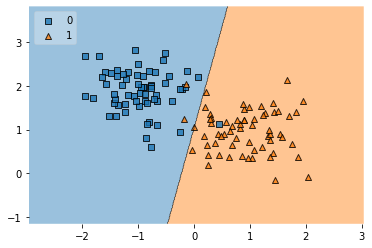

In [35]:
# Plotting the decision boundary for training data

y_train = np.reshape(Y_train, Y_train.shape[0])
plot_decision_regions(X=X_train, y=y_train, clf=logit_obj, legend=2)

We can see there are 3 mis classifications in the training data and 2 points are on boundary.

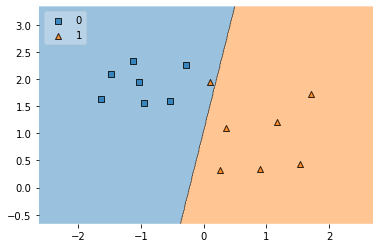

In [36]:
# Plotting the decision boundary for testing data

y_test = np.reshape(Y_test, Y_test.shape[0])
plot_decision_regions(X=X_test, y=y_test, clf=logit_obj, legend=2)

We see there is one misclassification in the test data.

### Question 8a Logistic Regression and Naive Bayes:
For this exercise, use Scikit-Learn in Python.     
a) Write down a code in Python (that uses logistic regression in Scikit-Learn) whose inputs are atraining dataset and a test dataset and its output is the classification error on the test set. Report theclassification error on the test set of the dataset used in the previous question.  Plot the data (use different colors for data in different classes) and plot the decision boundary found by the logisticregressions. Compare the results with results of the previous question and justify any discrepancy.

In [37]:
# Logistic Regression using Sklearn

def get_classification_error(X_train, Y_train, X_test, Y_test):
    
    # Fitting the sklearn Logistic Regression model
    model_lr = LogisticRegression(random_state=0).fit(X_train, Y_train)

    # Finding the accuracy and classification error for train and test data
    trainaccuracy = model_lr.score(X_train, Y_train)
    print("Training accuracy : ", round(trainaccuracy, 2))
    train_error = round(1-trainaccuracy, 2)
    testaccuracy = model_lr.score(X_test, Y_test)
    print("Testing accuracy : ", round(testaccuracy, 2))
    test_error = round(1-testaccuracy, 2)
    
    return model_lr, train_error, test_error

In [38]:
model_lr, train_error, test_error = get_classification_error(X_train, Y_train, X_test, Y_test)

print("Training classification error : ", train_error)
print("Testing classification error : ", test_error)

Training accuracy :  0.97
Testing accuracy :  0.93
Training classification error :  0.03
Testing classification error :  0.07


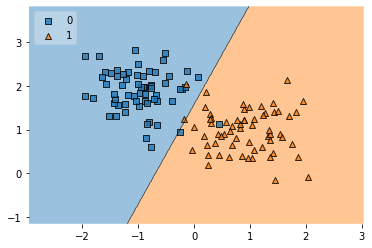

In [39]:
# Plotting the decision boundary for training data using sklearn logistic regression model

y_train = np.reshape(Y_train, Y_train.shape[0])
plot_decision_regions(X=X_train, y=y_train, clf=model_lr, legend=2)

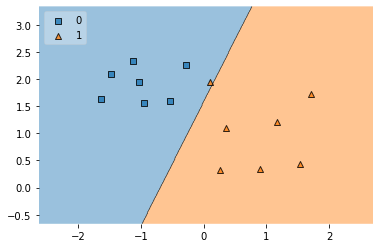

In [40]:
# Plotting the decision boundary for the test data using sklearn logistic regression model

y_test = np.reshape(Y_test, Y_test.shape[0])
plot_decision_regions(X=X_test, y=y_test, clf=model_lr, legend=2)

**Comparison :**

The accuracy and classification error for both models (self and sklearn's) are same and there is no discrepancy.

### Questions 8b :    
Repeat part a by using Naive Bayes from Scikit-Learn

In [41]:
# Training the Naive Bayes Model using Sklearn

model_nb = GaussianNB()
model_nb.fit(X_train,Y_train)

pred = model_nb.predict(X_test)
test_accuracy = metrics.accuracy_score(Y_test, pred)
print("Test Accuracy:", round(test_accuracy, 2))
print("Test classification error : ", round(1-test_accuracy, 2))

Test Accuracy: 0.93
Test classification error :  0.07


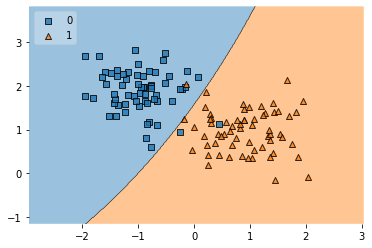

In [42]:
# Plotting Naive Bayes Decision Boundary for test data

y_train = np.reshape(Y_train, Y_train.shape[0])
plot_decision_regions(X=X_train, y=y_train, clf=model_nb, legend=2)

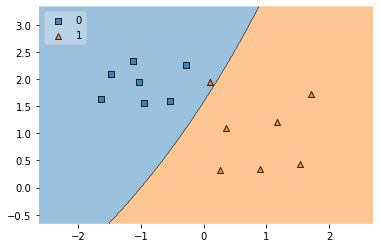

In [43]:
# Plotting Naive Bayes Decision Boundary for test data

y_test = np.reshape(Y_test, Y_test.shape[0])
plot_decision_regions(X=X_test, y=y_test, clf=model_nb, legend=2)